1. 군집화(Clustering) : Kmeans

예측된 클러스터 레이블(앞 10개): [1 1 1 1 1 1 1 1 1 1]
클러스터 중심 좌표:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


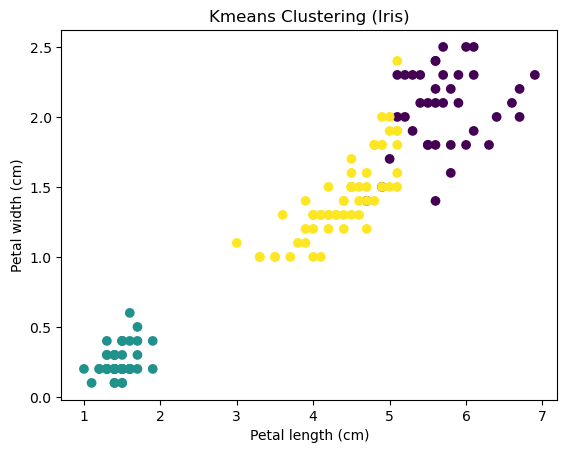

In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

# KMeans 모델 (군집 3개)
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

print("예측된 클러스터 레이블(앞 10개):", y_pred[:10])
print("클러스터 중심 좌표:", kmeans.cluster_centers_, sep='\n')

# 시각화(Petal)
plt.scatter(X[:,2], X[:,3], c=y_pred, cmap="viridis")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Kmeans Clustering (Iris)")
plt.show()

평가 지표
- Inertia (Elbow) : 군집 내 거리의 제곱 합
- Silhouette Score : 군집 내 응집도와 군집 간 분리도를 종합 평가

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

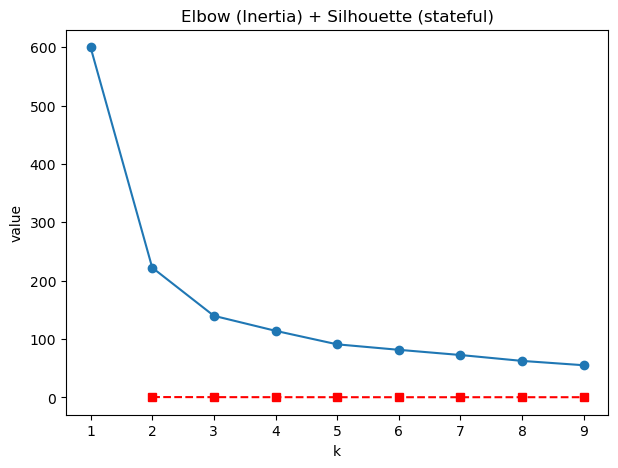

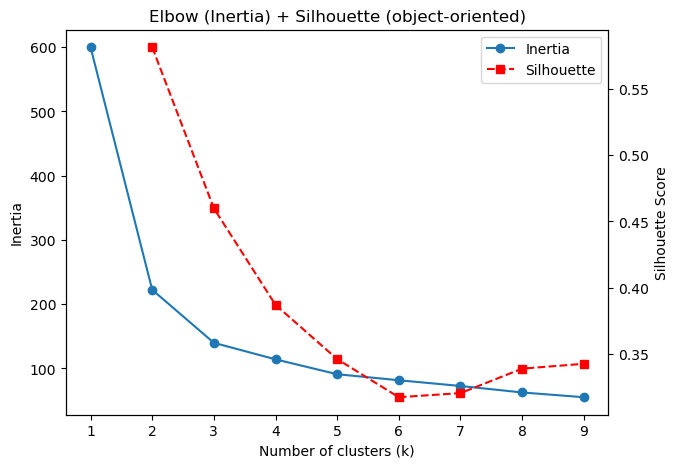

   k     inertia  silhouette
0  2  222.361705    0.581750
1  3  139.820496    0.459948
2  4  114.092547    0.386941
3  5   90.927514    0.345901
4  6   81.544391    0.317079
5  7   72.631144    0.320197
6  8   62.540606    0.338692
7  9   55.119493    0.342360


In [21]:
# 군집 품질 평가 : Inertia (Elbow) + Silhouette
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
X = iris.data

# KMeans도 거리(유클리드) 기반 알고리즘 -> 스케일링 권장(단위/범위가 큰 특성이 군집화 지배하지 않도록) => 파이프라인 사용
def make_pipeline(k, random_state=42):
  return Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=k, n_init=10, random_state=random_state))
  ])

# Inertia : 내부 응집도
inertia_k_range = range(1, 10)
inertias = []

for k in inertia_k_range:
  pipe = make_pipeline(k)
  pipe.fit(X)
  inertias.append(pipe.named_steps["kmeans"].inertia_)

# Silhouette : 응집도 + 분리도
silhouette_k_range = range(2, 10) # 이론적으로 2부터 정의됨
silhouettes = []

for k in silhouette_k_range:
  pipe = make_pipeline(k)
  
  # pipe.~ : 스케일링된 공간 적용
  # silhouette_score(DATA, LABELS) : 사용자가 입력 -> 스케일링된 X를 꺼내서 입력
  labels = pipe.fit_predict(X)
  X_scaled = pipe.named_steps["scaler"].transform(X)

  silhouettes.append(silhouette_score(X_scaled, labels))

# Plot

# 1) plt.plot : Stateful
plt.figure(figsize=(7,5))
plt.plot(inertia_k_range, inertias, marker='o', label="Inertia")
plt.plot(silhouette_k_range, silhouettes, color='r', marker='s', linestyle='--', label='Silhouette')
plt.xlabel("k")
plt.ylabel("value")
plt.title("Elbow (Inertia) + Silhouette (stateful)")
# inertia 값은 수백 단위, silhouette 값은 0~1사이이므로 siilhouette는 눌려서 안보임

# 2) plt.subplots : Object-oriented
fig, ax1 = plt.subplots(figsize=(7,5))

# inertia (elbow)
ax1.plot(inertia_k_range, inertias, marker='o', label='Inertia')
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("Inertia")

# silhouette
ax2 = ax1.twinx() # x축 공유
ax2.plot(silhouette_k_range, silhouettes, color='r', marker='s', linestyle='--', label='Silhouette')
ax2.set_ylabel("Silhouette Score")

# 범례
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.title("Elbow (Inertia) + Silhouette (object-oriented)")
plt.show()

# 수치 비교
df = pd.DataFrame({
  "k": list(silhouette_k_range),
  "inertia": [inertias[k-1] for k in silhouette_k_range],
  "silhouette": silhouettes
})
print(df)

Inertia
- 내부 응집도. 작을 수록 좋음
- BUT, K가 커지면 자동으로 줄어들기 때문에 엘보우 체크
- 1 > 2가 극심한 건 당연 (클러스터링 시작) => 2 이후부터 관찰해서 엘보우 지점 찾기

Silhouette
- 응집도 + 분리도. -1 ~ 1
- 1에 가까울수록 좋다
- 0 근처 -> 군집 경계에 있어 애매함
- 음수 -> 다른 군집에 속하는 게 낫다 (군집 잘못 배치)

실루엣 점수가 가장 높은 K지점(피크)가 K 후보<br>
단, 실루엣 점수 피크는 실제 라벨수와 일치하지 않는다.<br>

따라서, K는 silhouette + inertia(엘보우) + 도메인 지식 종합해서 결정
- 실루엣 -> K=2
- 엘보우 -> K=3
- 도메인 지식 -> 실제 품종 3개이므로 K=3

<br><br>
샘플별 실루엣 분포 : 플롯 시각화
- 군집별 품질 파악
- 군집 크기 불균형 확인 : 막대 두께(세로)
- 잘못된 분류 확인 : 음수

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=3 평균 실루엣: 0.4599


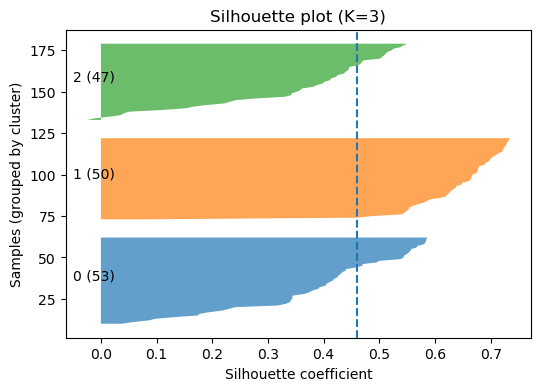

In [53]:
# 샘플별 실루엣 분포 플롯 그리기
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data

k = 3

pipe = Pipeline([
  ("scaler", StandardScaler()),
  ("kmeans", KMeans(n_clusters=k, n_init=10, random_state=42))
])
labels = pipe.fit_predict(X)
sample_sil = silhouette_samples(pipe.named_steps["scaler"].transform(X), labels) 

print(f"K={k} 평균 실루엣: {sample_sil.mean():.4f}")

# 군집별 정렬 후 막대 분포 그리기
plt.figure(figsize=(6,4))

y_lower = 10 # 첫 군집 막대 그래프 시작 높이를 10으로 잡아 여백 확보
for label in range(k):
  vals = sample_sil[labels == label]
  vals.sort()
  
  label_size = vals.shape[0] # 해당 군집에 포함된 샘플 수
  y_upper = y_lower + label_size

  # plt.fill_between(x, y1, y2) : x축 방향으로 y1 ~ y2 사이를 채움. 즉, x축 따라 세로 막대 쌓기
  # plt.fill_betweenx(y, x1, x2) : y축 방향으로 x1 ~ x2 사이를 채움. 즉, y축 따라 가로 막대 쌓기
  plt.fill_betweenx(np.arange(y_lower, y_upper), 0, vals, alpha=0.7)
  plt.text(-0.05, y_lower + 0.5*label_size, f"{label} ({label_size})")
  y_lower = y_upper + 10 # 군집 간 간격

plt.axvline(x=sample_sil.mean(), linestyle='--')
plt.xlabel("Silhouette coefficient")
plt.ylabel("Samples (grouped by cluster)")
plt.title(f"Silhouette plot (K={k})")
plt.show()

각 군집 막대가 세로로 두껍고 1에 가까울수록 좋음<br>
0 근처 / 음수가 많은 군집은 경계가 애매하거나 잘못 배정된 포인트가 많다는 뜻

<br>
PCA로 차원 축소 후 실루엣 점수의 변화 비교

In [48]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data

K_range = range(2, 10)
scores_raw = []
scores_pca = []

for k in K_range:
	# Raw (4D)
	pipe_raw = Pipeline([
		("scaler", StandardScaler()),
		("kmenas", KMeans(n_clusters=k, n_init=10, random_state=42))
	])
	labels_raw = pipe_raw.fit_predict(X)
	X_scaled = pipe_raw.named_steps["scaler"].transform(X)
	scores_raw.append(silhouette_score(X_scaled, labels_raw))
	
	# PCA (2D)
	pipe_pca = Pipeline([
		("scaler", StandardScaler()),
		("pca", PCA(n_components=2, random_state=42)),
		("kmeans", KMeans(n_clusters=k, n_init=10, random_state=42))
	])
	labels_pca = pipe_pca.fit_predict(X)
	X_pca = pipe_pca.named_steps["pca"].transform(pipe_pca.named_steps["scaler"].transform(X))
	scores_pca.append(silhouette_score(X_pca, labels_pca))
	
print(" K |  raw   | PCA 2D")
for k, sr, sp in zip(K_range, scores_raw, scores_pca):
	print(f"{k:2d} | {sr:.4f} | {sp:.4f}")

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

 K |  raw   | PCA 2D
 2 | 0.5818 | 0.6145
 3 | 0.4599 | 0.5092
 4 | 0.3869 | 0.4409
 5 | 0.3459 | 0.4156
 6 | 0.3171 | 0.4140
 7 | 0.3202 | 0.4155
 8 | 0.3387 | 0.4163
 9 | 0.3424 | 0.4409


c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


- PCA로 노이즈 감소 : 구조가 선형적으로 잘 펴지면 실루엣이 좋아질 수 있음
- BUT, 정보가 과도하게 압축되면 점수 떨어질 수도 있음

<br><br>
2. PCA<br>
 : 데이터들의 분산값이 큰 방향으로, 즉 가장 덜 편향적인 방향으로 축을 잡아서 차원을 줄이는 방법<br>
  → 특성의 단위/범위 영향을 받으므로 스케일링 권장

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


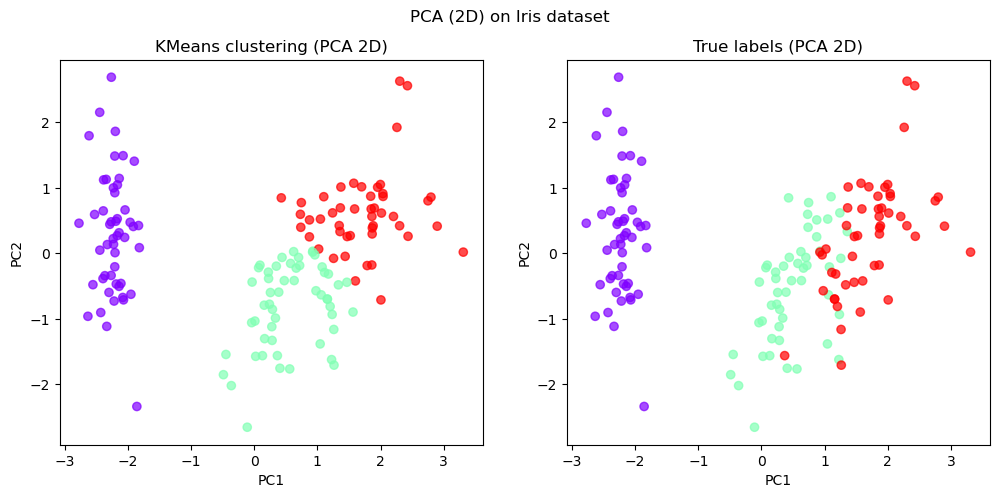

In [44]:
# Iris 데이터(4D) PCA(2D)+Kmeans 후 실제 품종 레이블과 비교
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target # 실제 품종 레이블

pipe = Pipeline([
  ("scaler", StandardScaler()),
  ("pca", PCA(n_components=2, random_state=42)),
  ("kmeans", KMeans(n_clusters=3, random_state=42, n_init=10))
])
pipe.fit(X)

# PCA 변환된 데이터 얻기
X_pca = pipe.named_steps["pca"].transform(
  pipe.named_steps["scaler"].transform(X)
)
labels = pipe.named_steps["kmeans"].labels_

# 군집 매핑 (색상 맞추기)
cm = confusion_matrix(y, labels) # 행: 실제 클래스, 열: cluster 번호
mapping = np.argmax(cm, axis=1)
"""
np.argmax 가장 큰 값의 인덱스 반환 (axis=1 : 각 행에서 가장 큰 열 인덱스 찾기)
=> 혼동행렬에서 각 클래스마다 가장 많이 겹친 cluster 번호 찾기
즉, 실제 클래스에 대응하는 군집 번호
"""
labels = np.array([mapping[label] for label in labels])

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 1) 군집 : KMeans 결과
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="rainbow", alpha=0.7)
axes[0].set_title("KMeans clustering (PCA 2D)")

# 2) 실제 품종 레이블
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="rainbow", alpha=0.7)
axes[1].set_title("True labels (PCA 2D)")

for ax in axes:
  ax.set_xlabel("PC1")
  ax.set_ylabel("PC2")

plt.suptitle("PCA (2D) on Iris dataset")
plt.show()

KMeans 결과(왼) : 모델이 데이터 패턴만 보고 군집화한 결과<br>
True labels(오) : 실제 Iris 3품종 라벨


=> Setosa는 깔끔히 분리되었지만 Versicolor와 Virginica는 일부 혼동

In [ ]:
# 각 주성분(PC)이 데이터 전체 분산 중 몇 %를 설명하는지 확인
pipe_expl = Pipeline([
  ("scaler", StandardScaler()),
  ("pca", PCA(n_components=4, random_state=42))
])
pipe_expl.fit(X)

# 분산 비율 출력
explained = pipe_expl.named_steps["pca"].explained_variance_ratio_
cumulative = explained.cumsum()

for i, (var, cum) in enumerate(zip(explained, cumulative), start=1): # enumerate의 인덱스 카운트를 1로 시작
  print(f"PC{i}: {var:.4f} (누적: {cum:.4f})")

PC1: 0.7296 (누적: 0.7296)
PC2: 0.2285 (누적: 0.9581)
PC3: 0.0367 (누적: 0.9948)
PC4: 0.0052 (누적: 1.0000)


3. 비지도 학습 확장ver